<a href="https://colab.research.google.com/github/OleksijShtoltz/machine-learning/blob/main/Case_11_Bike_Rental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимые библиотеки

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from google.colab import drive
from seaborn import heatmap
from seaborn import pairplot
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

#Загрузка и обработка данных

In [ ]:
df = pd.read_csv('day.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.sort_values(by = 'dteday', inplace=True)
df = df.set_index('dteday')
df = df.drop(['instant'], axis=1)

In [ ]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


#Первичный анализ

##Первичная оценка датасета

In [ ]:
df.shape

(731, 14)

In [ ]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##Визуальный анализ

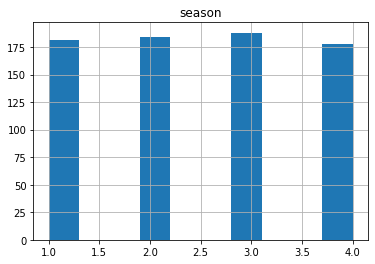

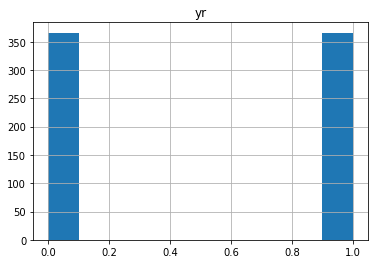

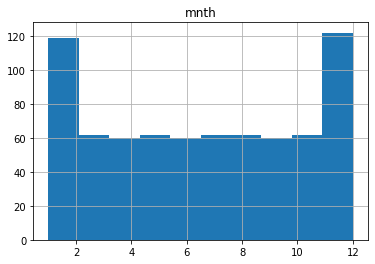

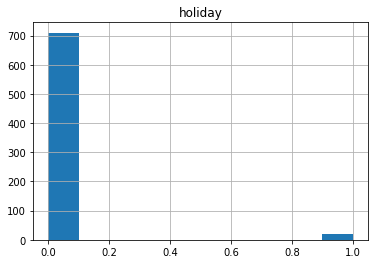

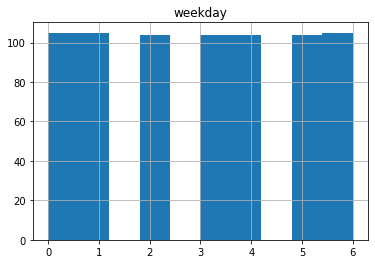

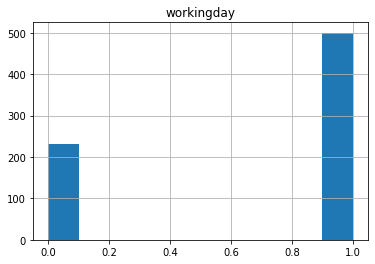

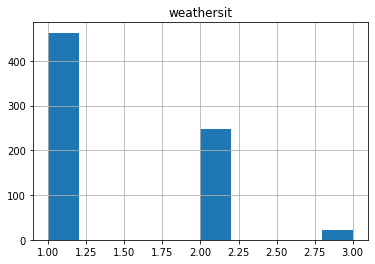

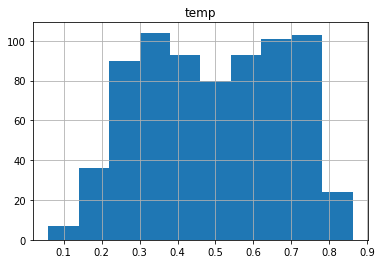

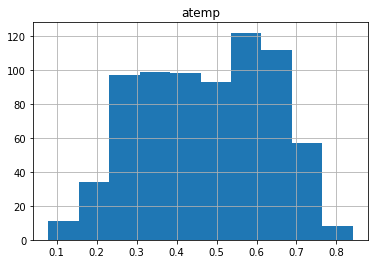

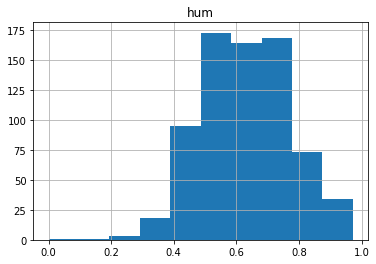

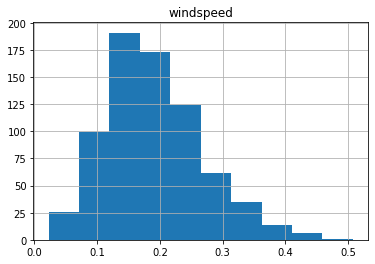

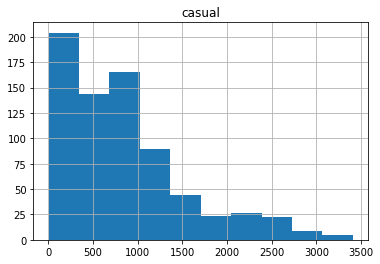

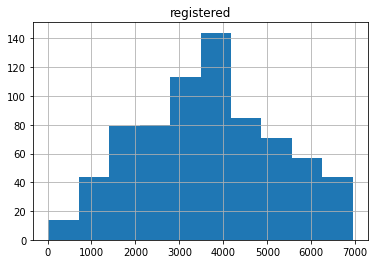

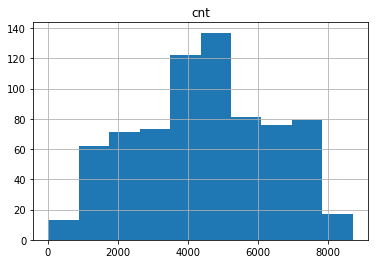

In [ ]:
for column in df.columns:
  df[column].hist()
  plt.title(column)
  plt.show()

##Исключение выбросов

In [ ]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

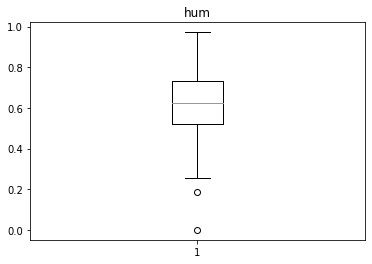

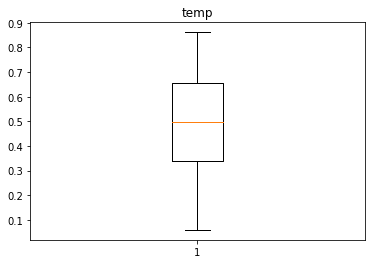

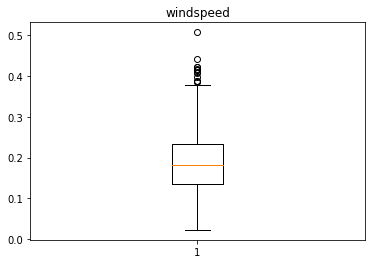

In [ ]:
for column in ['hum', 'temp', 'windspeed']:
  plt.title(column)
  plt.boxplot(df[column])
  plt.show()

In [ ]:
df.shape

(731, 14)

In [ ]:
for column in ['hum', 'temp', 'windspeed']:
  
  Q1 = df[column].quantile(q=0.25)
  Q3 = df[column].quantile(q=0.75)
  IQR = Q3 - Q1
  df.loc[df[column] < Q1-1.5*IQR, column] = np.nan
  df.loc[df[column] > Q3+1.5*IQR, column] = np.nan
  #if column != 'T, °С':
  #  df.loc[df[column] == 0, column] = np.nan

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(717, 14)

##Корреляция

Матрица попарных корреляций

In [ ]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 717 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      717 non-null    int64  
 1   yr          717 non-null    int64  
 2   mnth        717 non-null    int64  
 3   holiday     717 non-null    int64  
 4   weekday     717 non-null    int64  
 5   workingday  717 non-null    int64  
 6   weathersit  717 non-null    int64  
 7   temp        717 non-null    float64
 8   atemp       717 non-null    float64
 9   hum         717 non-null    float64
 10  windspeed   717 non-null    float64
 11  casual      717 non-null    int64  
 12  registered  717 non-null    int64  
 13  cnt         717 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 84.0 KB


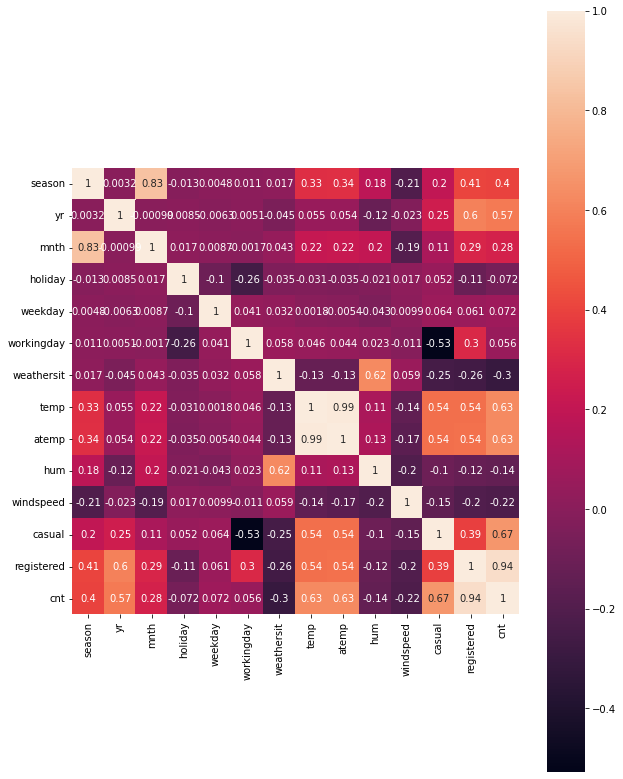

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
heatmap(df.corr(), square=True, annot=True, ax=ax)

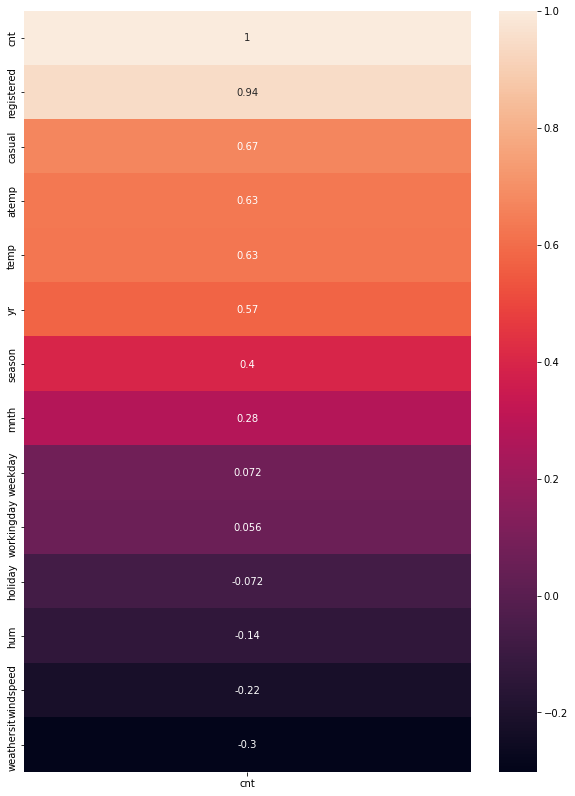

In [ ]:
fig, ax = plt.subplots(figsize=(10,14))
corr = df.corr()[['cnt']].sort_values(
  by='cnt', ascending=False)
heatmap(corr, annot=True, ax=ax)

Удаляем коррелирующие признаки

In [ ]:
df = df.drop(['atemp', 'registered', 'casual'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 717 entries, 2011-01-01 to 2012-12-31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      717 non-null    int64  
 1   yr          717 non-null    int64  
 2   mnth        717 non-null    int64  
 3   holiday     717 non-null    int64  
 4   weekday     717 non-null    int64  
 5   workingday  717 non-null    int64  
 6   weathersit  717 non-null    int64  
 7   temp        717 non-null    float64
 8   hum         717 non-null    float64
 9   windspeed   717 non-null    float64
 10  cnt         717 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 67.2 KB


#Прогнозирование

##Подготовка данных для обучения

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
test_results = pd.DataFrame()

Разбиение на обучающую и тестовую выборку

In [ ]:
X = np.matrix(df.drop(['cnt'], axis=1))
y = np.array(df['cnt'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=10)

In [ ]:
time = df.index[-y_test.shape[0]:]

Нормализация данных

In [ ]:
df.describe().transpose()[['mean', 'std']]

,mean,std
season,2.513250,1.105550
yr,0.499303,0.500349
mnth,6.562064,3.439113
holiday,0.029289,0.168732
weekday,2.995816,2.001741
workingday,0.684798,0.464921
weathersit,1.396095,0.543511
temp,0.497365,0.183617
hum,0.631562,0.139222
windspeed,0.186287,0.071786


In [ ]:
normalizer = keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(X))

In [ ]:
print(normalizer.mean.numpy())

[[2.5132499  0.49930272 6.5620646  0.0292887  2.9958155  0.6847978
  1.3960949  0.49736476 0.6315622  0.18628652]]


Пример исходных данных и нормализоыванных

In [ ]:
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[1.   0.   1.   0.   6.   0.   2.   0.34 0.81 0.16]]

Normalized: [[-1.37 -1.   -1.62 -0.17  1.5  -1.47  1.11 -0.83  1.25 -0.36]]


Функция для отрисовки графика ошибки во время обучения

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 0.05])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

##Линейная регрессия sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
print('Train score: ', reg.score(X_train, y_train))
reg.score(X_train, y_train)
print('Test score: ', reg.score(X_test, y_test))

Train score:  0.7981211619022393
Test score:  0.6065479369362834


In [ ]:
y_reg_predict = reg.predict(X_test)

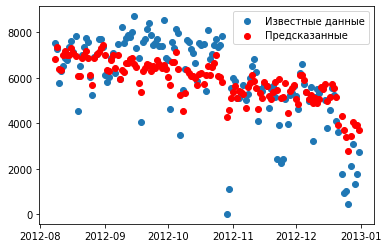

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

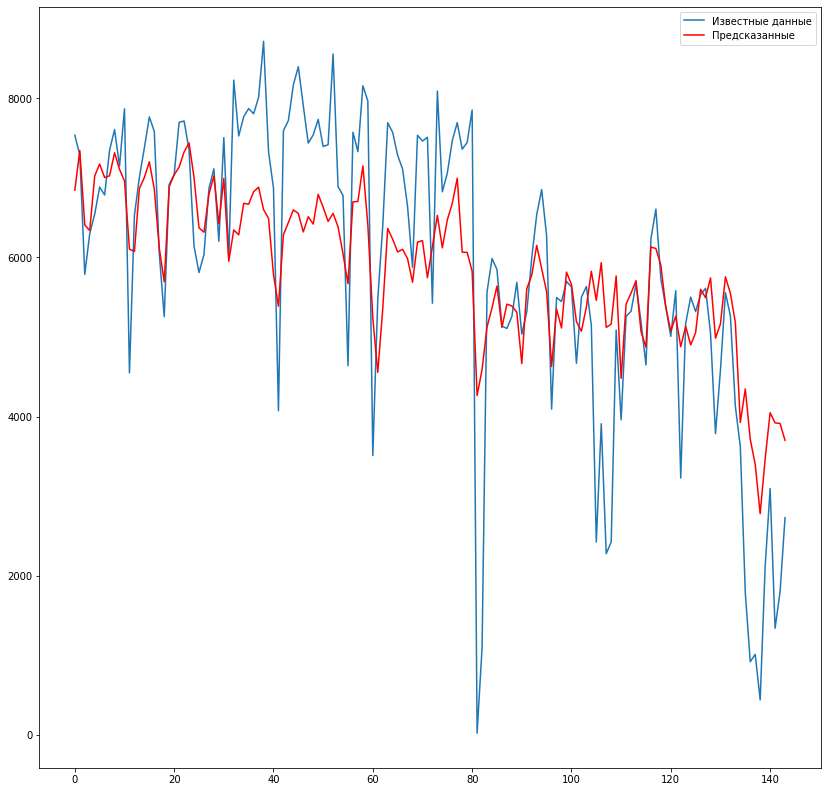

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
plt.plot(y_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_reg_predict))

Mean Squared Error: 1353284.9217630674


##Lasso регрессия

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(X_train, y_train)
print('Train score: ', lasso_reg.score(X_train, y_train))
lasso_reg.score(X_train, y_train)
print('Test score: ', lasso_reg.score(X_test, y_test))

Train score:  0.7967312158976244
Test score:  0.5888997209632463


In [ ]:
y_lasso_reg_predict = lasso_reg.predict(X_test)

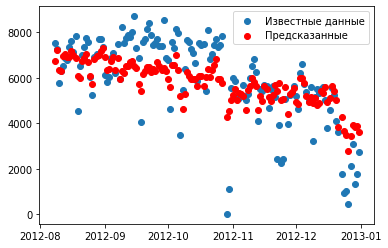

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_lasso_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

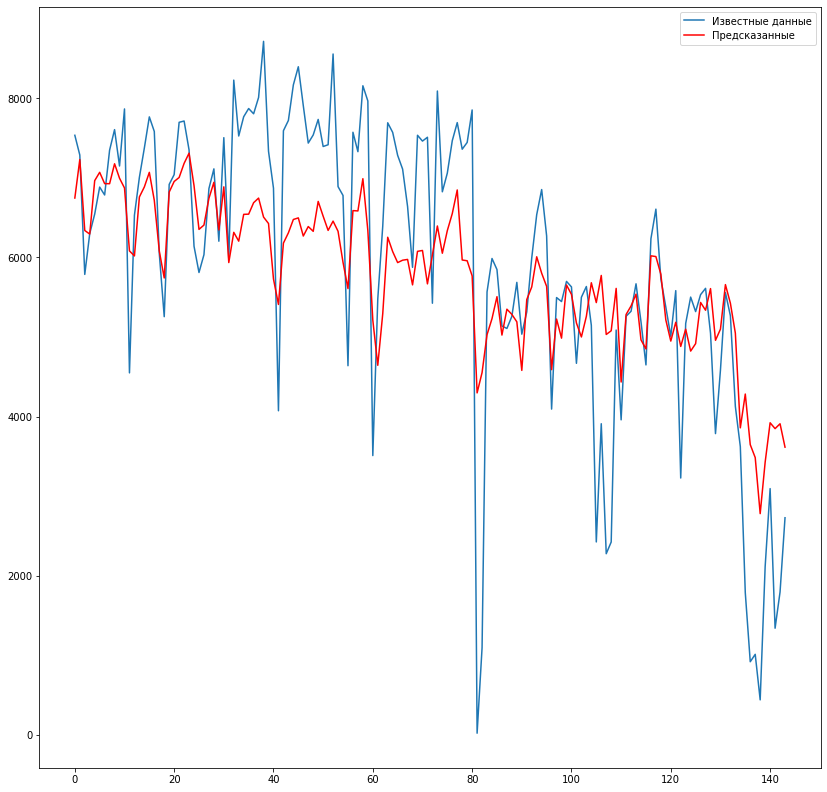

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
plt.plot(y_lasso_reg_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_lasso_reg_predict))

Mean Squared Error: 1413986.254439677


##Нейронная сеть

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=X_train.shape[1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(64, activation='LeakyReLU'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='LeakyReLU'))
model.add(keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.01),
                             activation='LeakyReLU'))
model.add(keras.layers.Dense(64, activation='LeakyReLU'))
model.add(keras.layers.Dense(64, activation='LeakyReLU'))

model.add(keras.layers.Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                      

In [ ]:
%%time
history = model.fit(
    X,
    y,
    validation_split=0.3,
    verbose=0, epochs=50)

CPU times: user 6.29 s, sys: 292 ms, total: 6.59 s
Wall time: 13.2 s


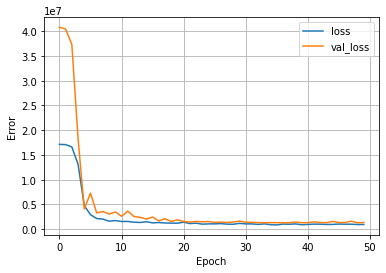

In [ ]:
plot_loss(history)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#model = keras.models.load_model('/content/drive/MyDrive/Data/Кейс_прогноз_цены_велосипедов_v1.1')

In [ ]:
y_predict = model.predict(X_test)
time = df.index[-y_predict.shape[0]:]

In [ ]:
y_predict = y_predict.reshape(1, -1)[0]

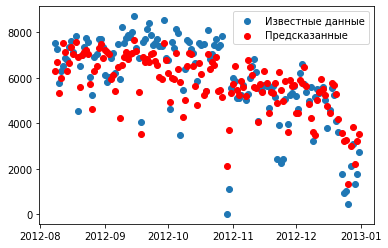

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

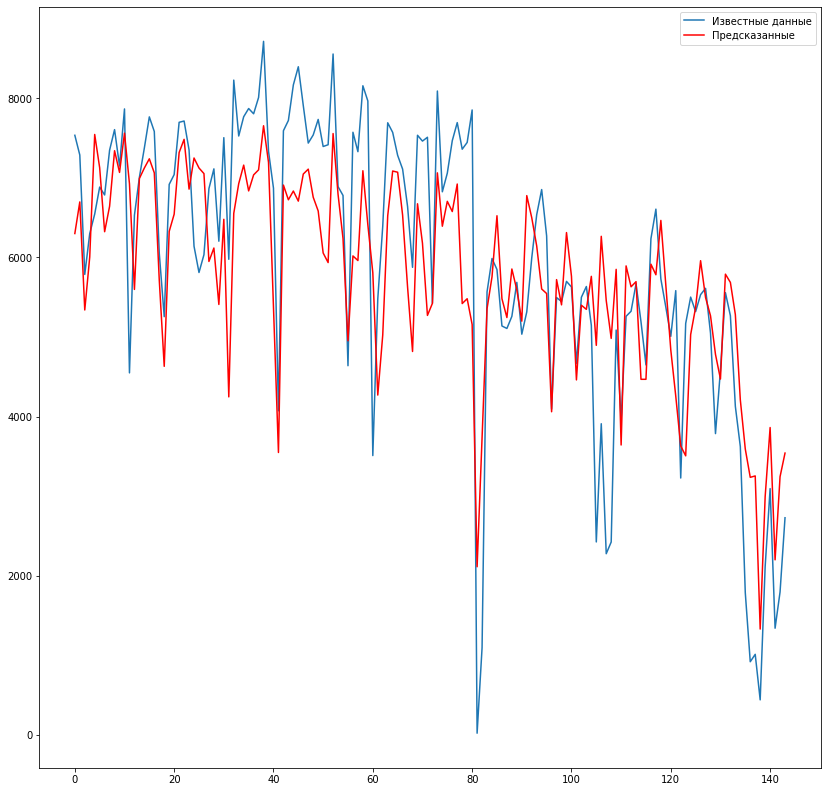

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
#plt.show()
plt.plot(y_predict, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))

Mean Squared Error: 1177280.1691533779


In [ ]:
#model.save('/content/drive/MyDrive/Data/Кейс_прогноз_цены_велосипедов_v1.3')

##Деревья решений

In [ ]:
regressor = DecisionTreeRegressor(max_depth=30, criterion="squared_error")
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [ ]:
y_pred = regressor.predict(X_test)

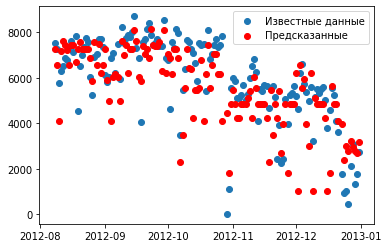

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_pred, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

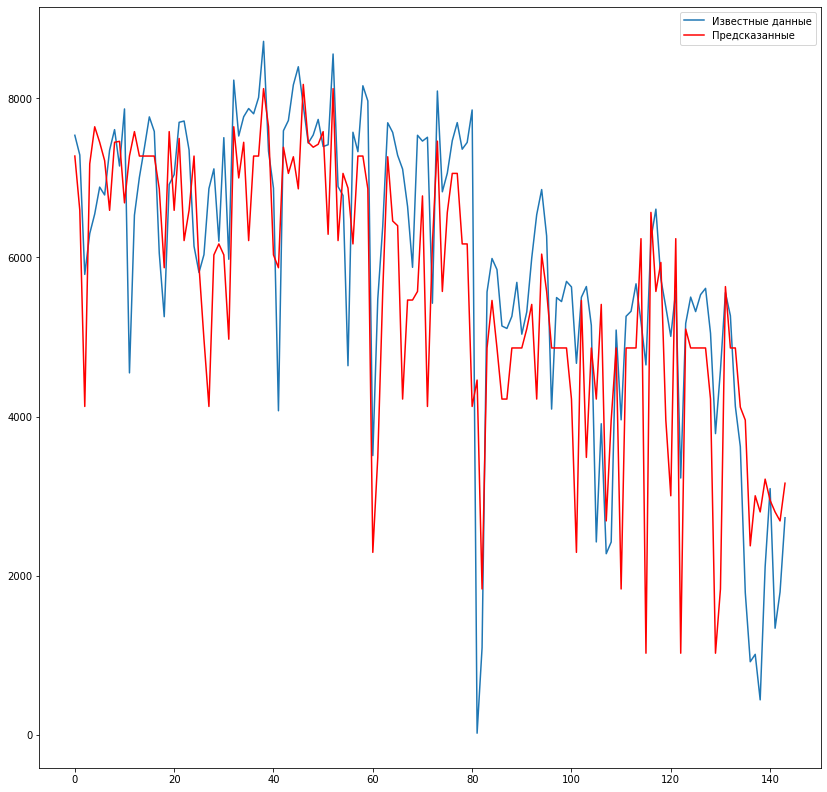

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
#plt.show()
plt.plot(y_pred, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1656394.548611111


In [ ]:
export_graphviz(regressor, out_file ='tree.dot') 

##K - ближайших соседей

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred_neigh = neigh.predict(X_test)

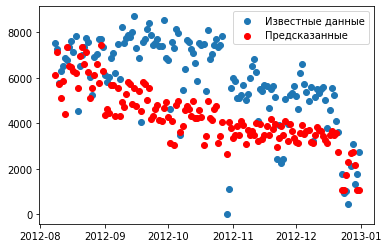

In [ ]:
plt.scatter(x = time, y = y_test, label='Известные данные')
plt.scatter(x = time, y = y_pred_neigh, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

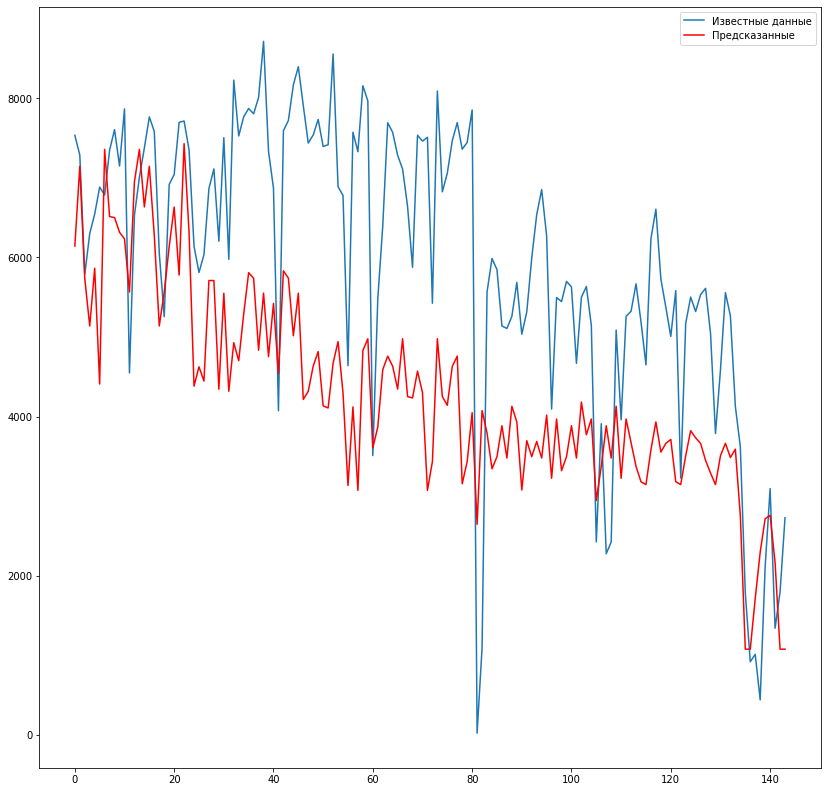

In [ ]:
plt.figure(figsize=(14, 14))
plt.plot(y_test, label='Известные данные')
#plt.show()
plt.plot(y_pred_neigh, color='red', label='Предсказанные')
plt.legend(['Известные данные', 'Предсказанные'])

plt.show()

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_neigh))

Mean Squared Error: 4437962.970679011
